<a href="https://colab.research.google.com/github/AliEbadi110/Tabular-Data-Classification-Sample-Projects/blob/main/Tabular_Data_PyTorch_Classification_FFNN_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tabular Data - PyTorch - Classification - FFNN - Diabetes**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


## 1. Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Data Overview

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## 3. Exploratory Data Analysis

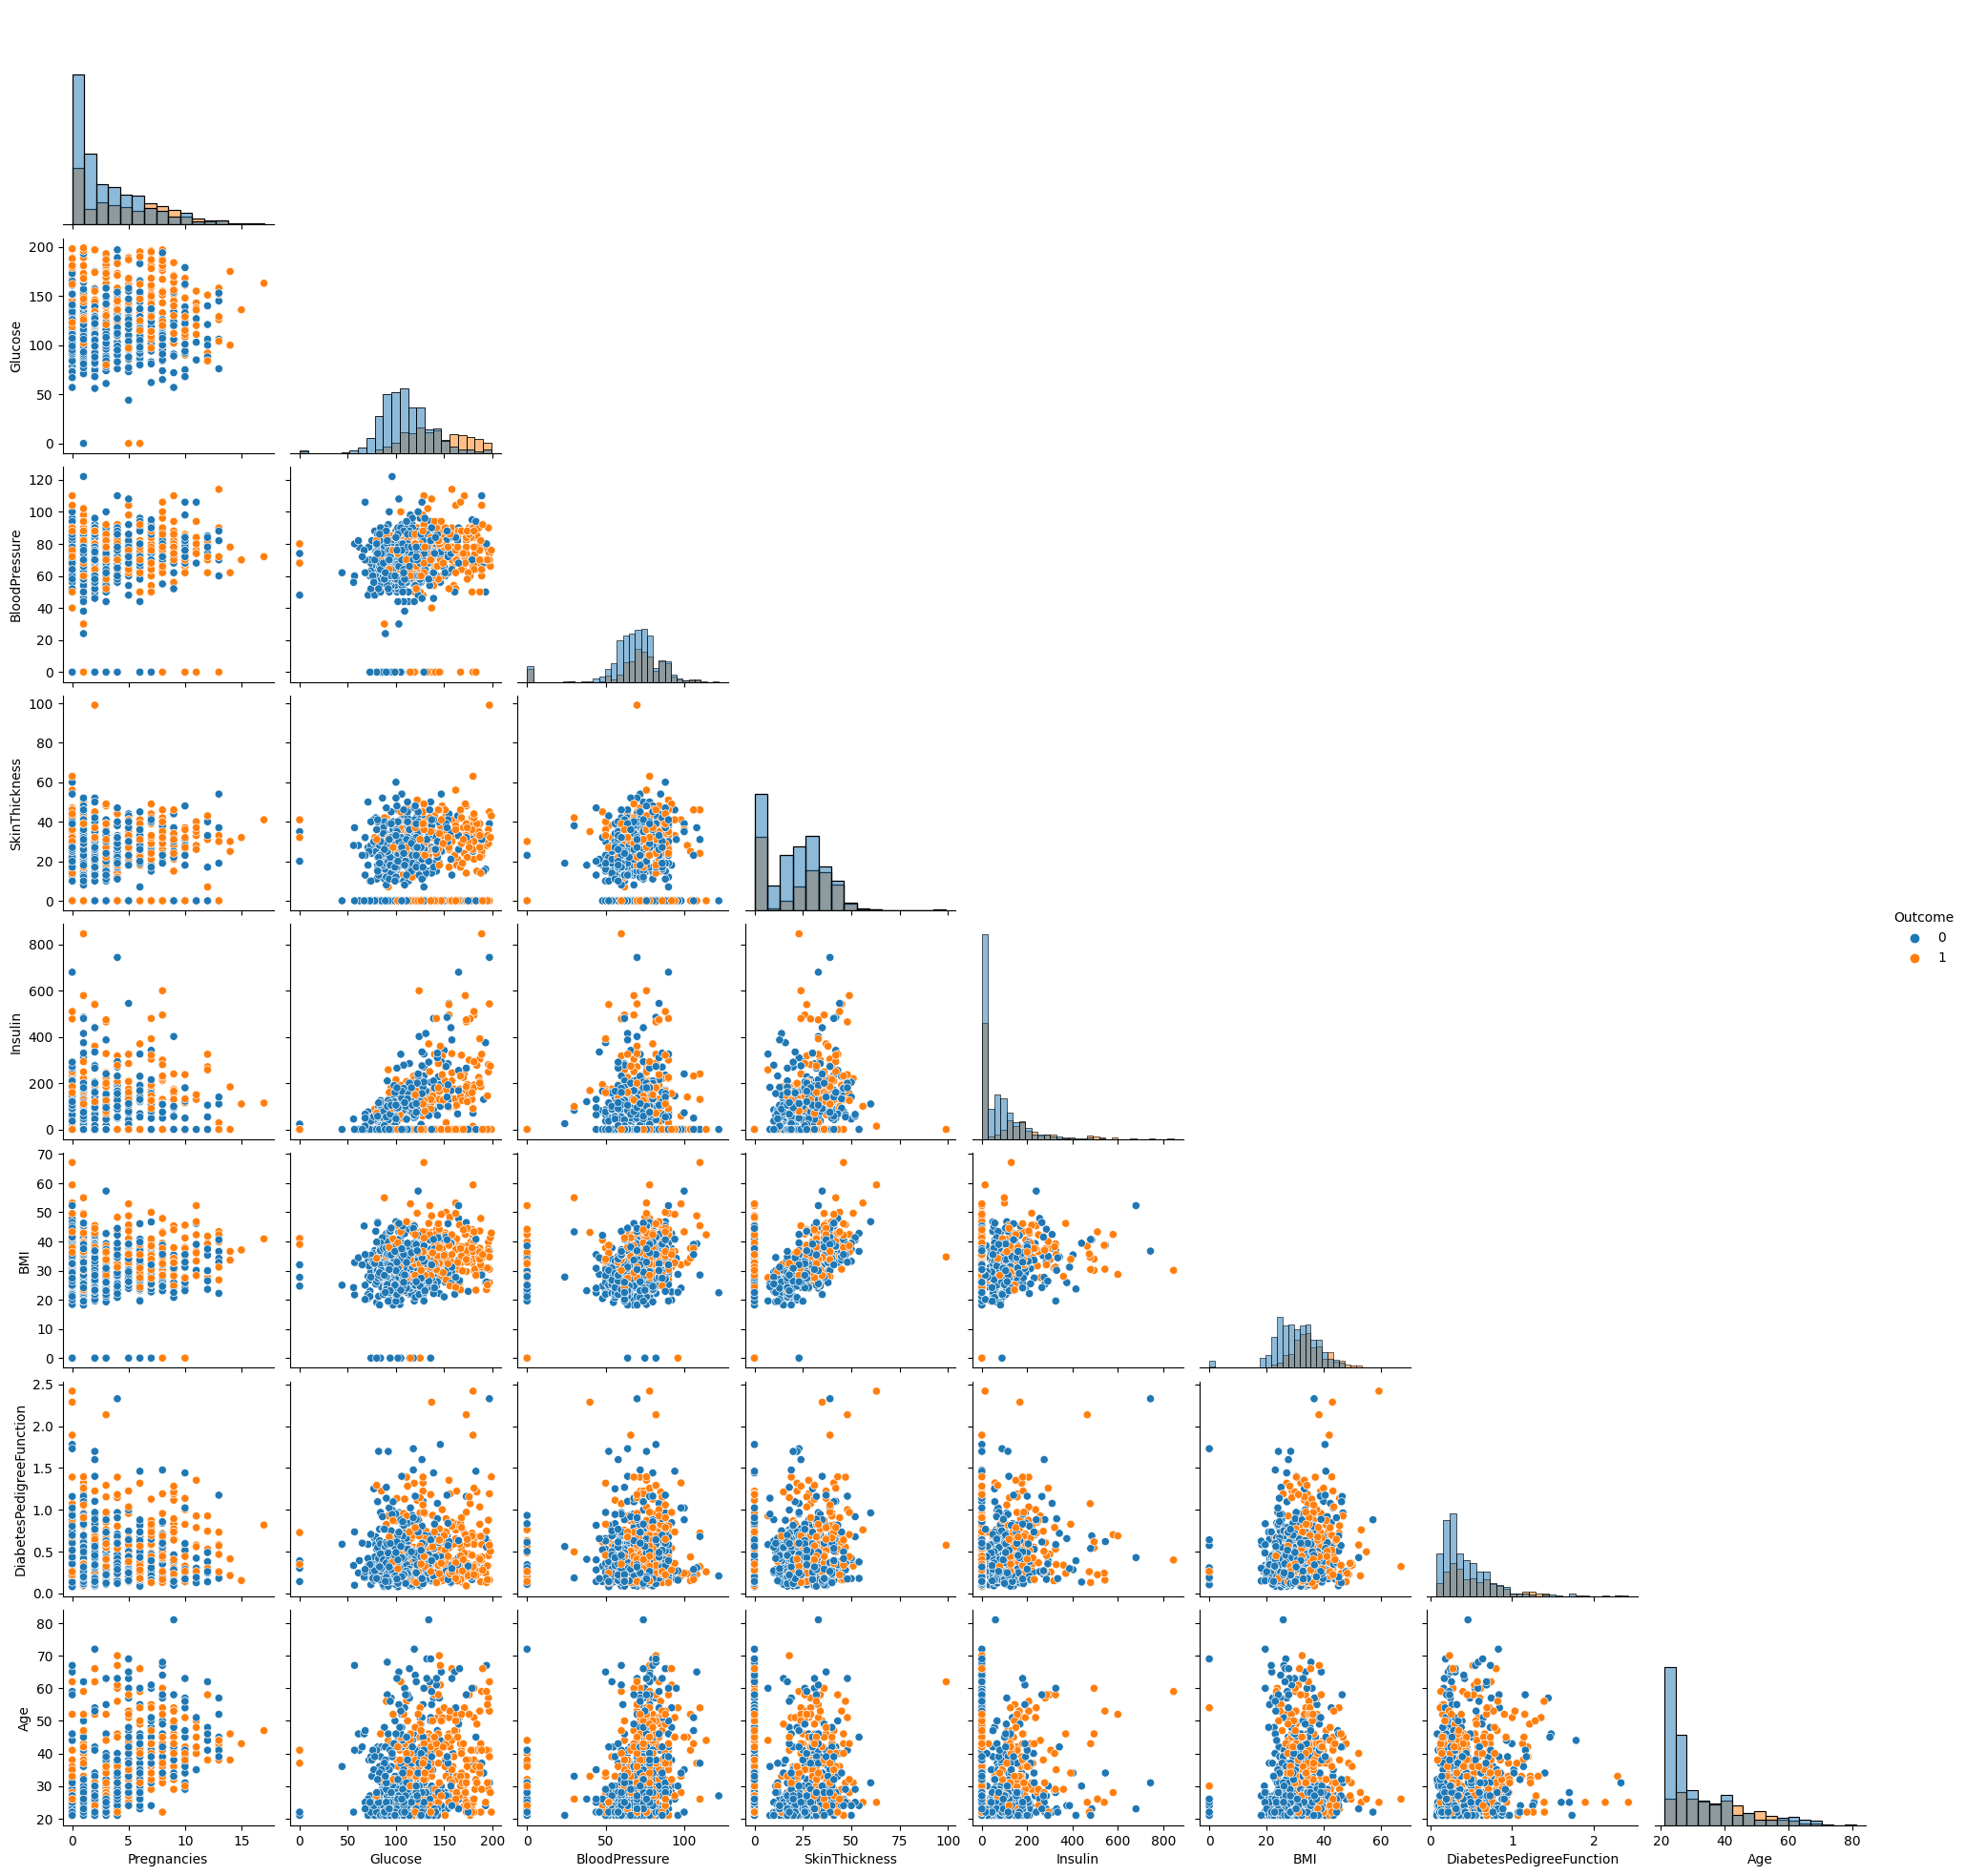

In [ ]:
sns.pairplot(data=df, hue='Outcome', diag_kind="hist", corner=True)

## 4. Target Variable Preprocessing

In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='count', ylabel='Outcome'>

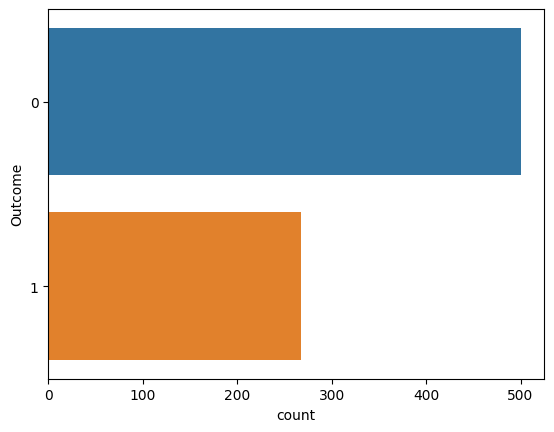

In [ ]:
sns.countplot(data=df, y='Outcome')

In [ ]:
df.Outcome.isnull().sum()

0

## 5. Handling Missing Values

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

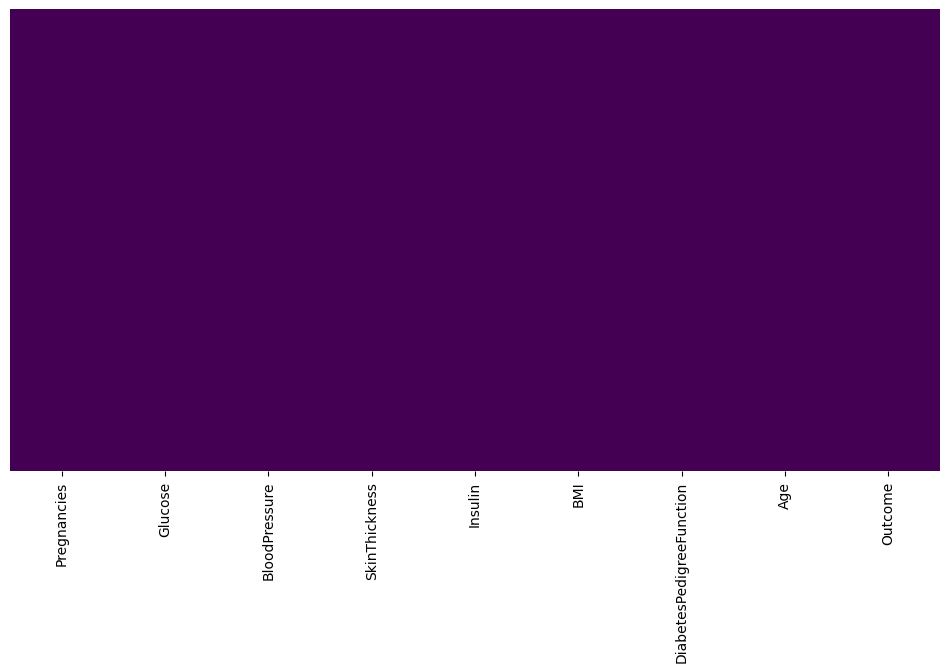

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## 6. Handling Categorical features

In [ ]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

## 7. Train_Test_Split

In [ ]:
y = df.Outcome.values.reshape(-1, 1)
X = df.drop(columns=['Outcome']).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 8. Normalizing the Data

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

## 9. Build Model

In [ ]:
class Model(nn.Module):
  def __init__(self, in_features=X_train.shape[1]):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(in_features, 16),
      nn.ReLU(),
      nn.Linear(16, 32),
      nn.ReLU(),
      nn.Linear(32, 8),
      nn.ReLU(),
      nn.Linear(8, 1),
      nn.Sigmoid(),
      )

  def forward(self, x):
    y_pred = self.layers(x)
    return y_pred

In [ ]:
model = Model()
model.to(device)

Model(
  (layers): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
summary(model, (X_train.shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 614, 16]             144
              ReLU-2              [-1, 614, 16]               0
            Linear-3              [-1, 614, 32]             544
              ReLU-4              [-1, 614, 32]               0
            Linear-5               [-1, 614, 8]             264
              ReLU-6               [-1, 614, 8]               0
            Linear-7               [-1, 614, 1]               9
           Sigmoid-8               [-1, 614, 1]               0
Total params: 961
Trainable params: 961
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.53
Params size (MB): 0.00
Estimated Total Size (MB): 0.56
----------------------------------------------------------------


In [ ]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.7)

## 10. Train Model

In [ ]:
X_train_tensor = torch.Tensor(X_train)
X_test_tensor = torch.Tensor(X_test)
y_train_tensor = torch.Tensor(y_train)
y_test_tensor = torch.Tensor(y_test)

In [ ]:
n_epochs = 100
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for i in range(n_epochs):
  model.train()
  for x, target in zip(X_train_tensor, y_train_tensor):
    optimizer.zero_grad()
    outputs_train = model(x)
    loss_train = criterion(outputs_train, target)

    loss_train.backward()
    optimizer.step()

  model.eval()
  for x, target in zip(X_test_tensor, y_test_tensor):
    outputs_test = model(x)
    loss_test = criterion(outputs_test, target)

  train_losses[i] = loss_train.item()
  test_losses[i] = loss_test.item()

  if (i+1) % 10 == 0:
    print(f'Epoch {i+1}/{n_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 10/100, Train Loss: 0.2051, Test Loss: 0.1458
Epoch 20/100, Train Loss: 0.2111, Test Loss: 0.1043
Epoch 30/100, Train Loss: 0.2035, Test Loss: 0.0988
Epoch 40/100, Train Loss: 0.1961, Test Loss: 0.0957
Epoch 50/100, Train Loss: 0.2147, Test Loss: 0.0970
Epoch 60/100, Train Loss: 0.2064, Test Loss: 0.0972
Epoch 70/100, Train Loss: 0.1998, Test Loss: 0.1040
Epoch 80/100, Train Loss: 0.2059, Test Loss: 0.1129
Epoch 90/100, Train Loss: 0.2319, Test Loss: 0.1121
Epoch 100/100, Train Loss: 0.2462, Test Loss: 0.1099


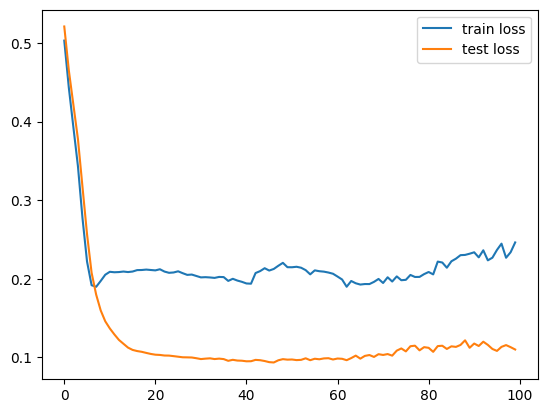

In [ ]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()

## 11. Predict, Evaluate

In [ ]:
with torch.no_grad():
  y_val_tensor = model.forward(X_test_tensor)
  y_val = np.round(y_val_tensor.numpy())

In [ ]:
print(classification_report(y_val, y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       101
         1.0       0.64      0.64      0.64        53

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
print(confusion_matrix(y_val, y_test))

[[82 19]
 [19 34]]
